<a href="https://colab.research.google.com/github/audrb1999/CS149_assignment/blob/main/CS149_assignment/Written%20assignment/written/written_assignment1_%ED%92%80%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem 1

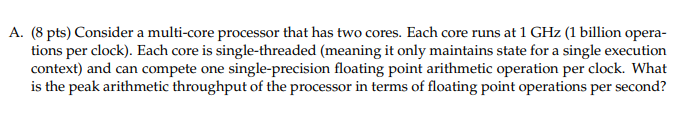

조건

1. 2개의 코어를 가진 multi processor가 존재
2. 각 코어는 1GHz(초당 10억 클럭 발생)
3. 각 코어는 1개의 스레드만을 가집니다.
4. 1clock당 1개의 single-precision floating point arithmetic operation을 실행합니다.

프로세서의 최대 산술 처리량은 코어 수, 각 코어의 클록 속도 및 각 코어가 클록 주기당 수행할 수 있는 작업 수를 곱하여 계산할 수 있습니다.


- 처리량 = 클럭속도 $\times$  IPC $\times$ 코어 수 $\times$ 스레드 수

  </br>

$  1B \times 1 \times 2 \times 1  = 2B$ FLOPS

</br>

> 답: 초당 20억개의 floating point 연산을 진행

.

</br>

---

</br>
.

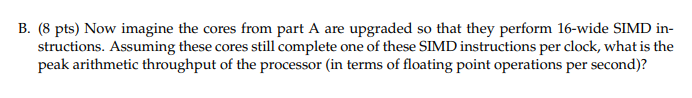

조건

1. A의 코어가 업그레이드 되어 16 - wide SIMD가 가능합니다.
2. 클럭당 1개의 SIMD 명령을 완료합니다.

- 16-wide SIMD는 연산을 한 번에 16개의  데이터에 적용하여 시간을 줄임, 이전보다 16개의 연산을 더 진행

</br>

$2 \times 1B \times 1 \times 16 = 32B$ FLOPS

</br>

> 답: 초당 320억개의 floating point 연산을 수행

.

</br>

---

</br>
.

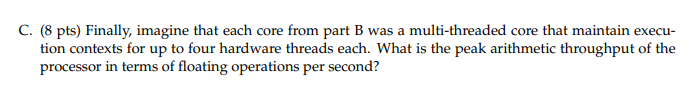

조건

- B에 각 코어가 각각 최대 4개의 하드웨어 스레드에 대한 execution context를 유지하는 multi thread core를 적용


</br>

$2 \times 1B \times 4(thread) \times 16  = 128B$ FLOPS

</br>

> 답: 초당 1280억 번의 floating point 연산을 진행

.

</br>

---

</br>
.

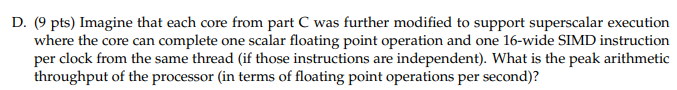

조건

1. C부분의 각 코어가 superscalar를 지원하도록 변경
2. 모든 명령어는 독립적

- superscalar로 클럭당 2배 증가한 걸로 보임, superscalar 명령 1개와 16-wide SIMD를 진행하므로

</br>

$2 \times 1B \times 4(thread) \times (16 + 1)  = 136B$ FLOPS

</br>

> 답: 초당 1360억 번 floating point 연산을 진행

.

</br>

---

</br>
.

## Problem 2

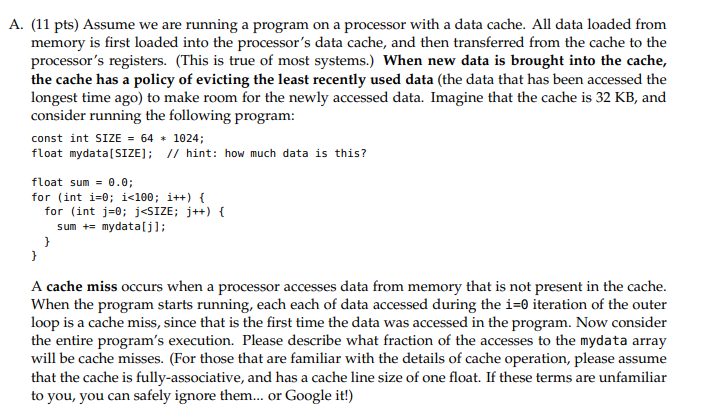

data cache가 있는 프로세서를 실행한다고 가정해보자, cache는 32KB

1. 메모리에서 load된 모든 데이터는 먼저 프로세서의 데이터 cache에 load 됩니다.

2. 그 다음 캐시에서 프로세서 레지스터로 이동합니다.

3. 새 데이터를 가져올 때 가장 최근에 사용되지 않은 데이터를 제거합니다.

4. 외부 루프 i = 0 반복 동안 첫 액세스 이기 때문에 cache miss 입니다.


float은 4바이트, cache의 용량이 32kb이니 
- $ \frac {32768_{byte}} {4_{byte}} = 8192 $개를 저장할 수 있습니다.

- 배열의 크기는 $64 \times 1024 = 65,536$개의 float을 가진 배열입니다. 
 - mydata의 크기는 256kb입니다.

</br>

- miss 횟수: $65536 + (65536 - 8192) \times 99 = 5,742,592$

- 총 access 수: $65536 \times 100 = 6,553,600$

- miss rate: $5,742,592 / 6,553,600 = 0.87625%$


</br>

> 답: miss가 발생할 확률은 87.625% 입니다. 

</br>
</br>

궁금한점: LRU면 cache보다 배열이 더 큰 경우 위와같이 순차적으로 배열의 데이터를 액세스할 때 100% cache miss가 발생하지 않을까요?

- ex) 32KB cache에 float 16384개를 가진 my_data 배열을  0~16384까지 100번 액세스 한다면 (FIFO, LRU)
 - 32,768/4 = 8192
 - my_data[0] ~ my_data[8191]까지 액세스했을 때 cache가 꽉차게 되고
 - 그 다음 my_data[8192]를 액세스할 때 my_data[0]이 사라지게 될텐데 그러면 한 루프가 끝나면 cache에 남아있는 데이터는 my_data[8192] ~ my_data[16383]이 될테고
 - 다음 루프를 진행할 때 my_data[0]이 없으니 miss가 발생하지 않을까요?


> 답: 100%

.

</br>

---

</br>
.

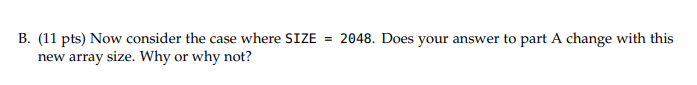

1. mydata의 SIZE가 2048로 변경된 경우입니다.

이제 cache가 데이터를 전부 가지고 있을 수 있어서 첫 루프에서 발생하는 2048 개의 miss만 고려하면 됩니다.


- i = 0에 한에서, miss는 2048번 발생
- 전체 액세스는 $100 \times 2048 = 204,800$
- $2048/204,800$

</br>

> 답: miss가 발생할 확률은 1% 

.

</br>

---

</br>
.

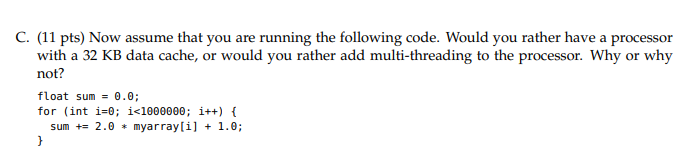

- multi threading을 추가한 processor는 기존에 사용한 cache보다 용량이 더 적다는 조건인거 같습니다.

- 32kb cache를 가진 single thread와 32kb보다는 적은 cache를 가진 multi thread를 비교

</br>

 loop 반복문을 빠르게 처리하는데 cache 용량이 중요할까? 아니면 multi thread가 중요할까? 이런 문제인거 같습니다.


 

그러면 cache가 어떤 상황일 때 가장 속도가 빨라지는지와 multi thread가 어떤 상황일 때 빨라지는지를 생각해보겠습니다.

</br>

Cache


- 배열의 크기가 너무 커서 100% miss가 발생하는 문제라고 생각이 됩니다.


Multi thread

- 각 루프들은 독립적이라서 multi thread를 사용하면 병렬처리가 가능할 것같습니다.
- 2개를 사용한다면 500,000반복을 진행하면 될 거 같습니다.


</br>

정리해보자면 배열이 너무 길고 각 원소들에 대해서 1번만 참조를 하니 cache를 사용했을 때 단점이 생기지만 multi thread를 사용했을 때 단점이 보이지 않으니 저는 Multi thread를 사용할 거 같습니다.

> 답: Multi thread 사용

.

</br>

---

</br>
.

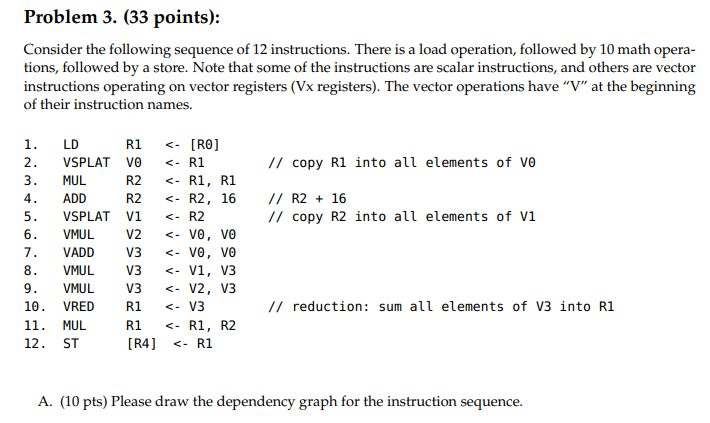

해당 코드에 종속성을 생각해보자면

1. 1번 line으로 종속성이 존재하지 않습니다.
2. 2번 line의 경우 R1의 값을 copy하니 1번 line이 완료되어야 합니다. (1번과 종속)
3. 3번 line의 경우 R[0]값이 R1에 들어와야하기 때문에 (1번과 종속)
4. 4번 line은 R2에 값이 있어야하니 (3번과 종속) 
5. 5번 line (4번과 종속)
6. 6번 line (2번과 종속)
7. 7번 line (2번과 종속)
8. 8번 line (5, 7번과 종속)
9. 9번 line (6, 8번과 종속)
10. 10번 line (9번과 종속)
11. 11번 line (10번과 종속)
 - 10번이 완료시키기 위해서는 5번이 완료되어야하기 때문에 5번과는 종속성이 없는건지 있는건지 햇갈립니다.

12. 12번 (11번과 종속)

>답:

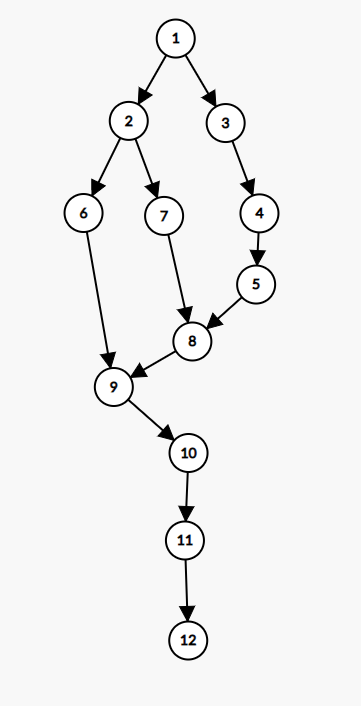

.

</br>

---

</br>
.

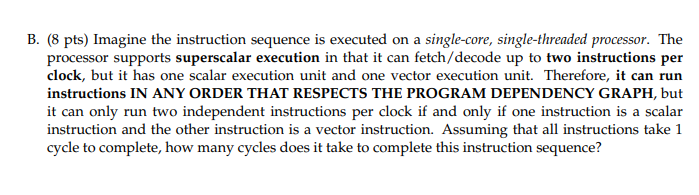

위 그래프를 봐보자면 ILP가 9입니다.

> 답: 9 cycle이 걸릴 것 같습니다.

.

</br>

---

</br>
.

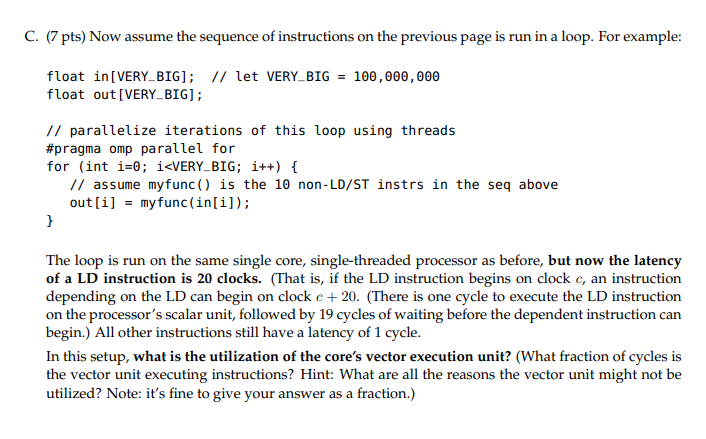

- LD의 경우 20cycle이 더 걸립니다.
- 전체 cycle 수는 
 - LD의 20cylce + 나머지 11cycle이 됩니다. 



vector unit이 실행되는 cycle
- 2번, 5번, 6번, 7번, 8번, 9번, 10번
- 루프로 100,000,000번 실행이 됩니다.

전체 cycle은 31로 본다면

> 답: $\frac {7 \times 100,000,000} {31 \times 100,000,000} = \frac 7 {31}$



.

</br>

---

</br>
.

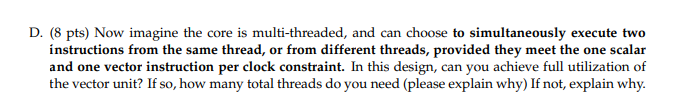

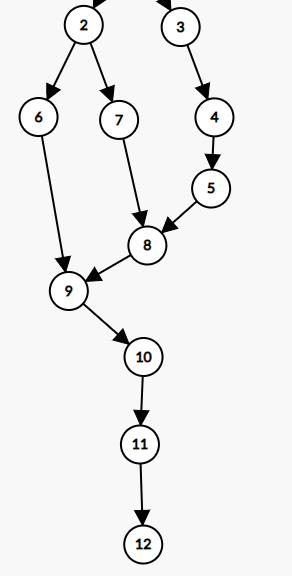

> 답: 2개

종속성을 생각하면 8번 작업 이전까지는 2개의 스레드로 처리할 수 있기 때문입니다.



.

</br>

---

</br>
.

## Problem 3

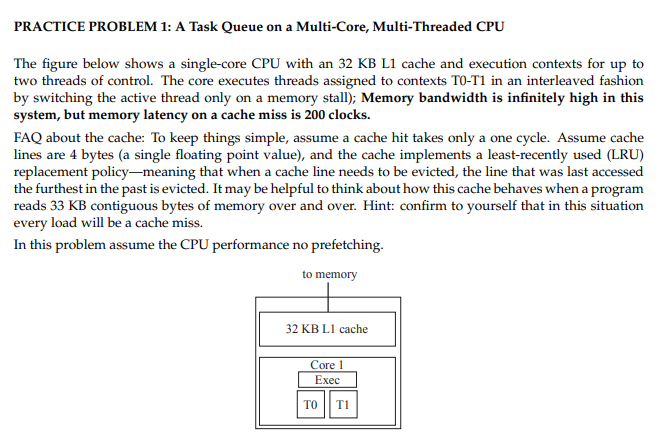

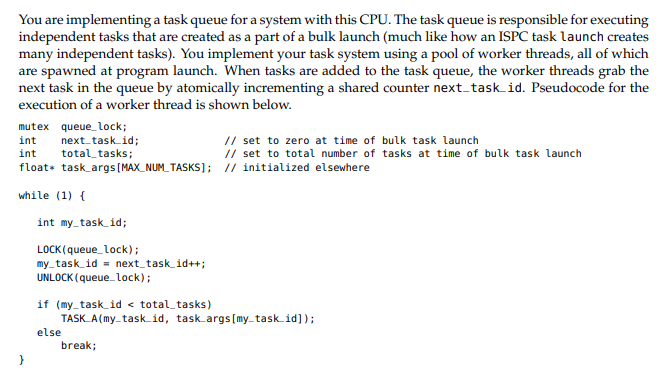

조건

- 2개의 thread, 32KB cache, single core cpu
- cache miss 발생시 200cycle, cache hit은 cycle
- next_task_id는 다음 작업을 의미

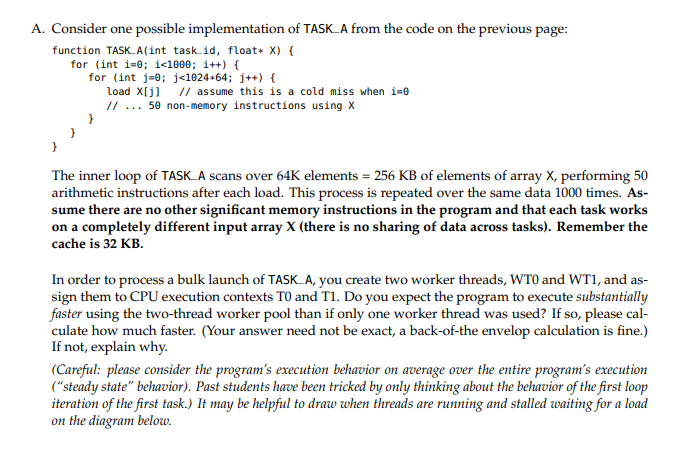

이전 코드의 TASK_A 함수를 구현할 때

- task_id와 task_id에 해당하는 작업을 인자로 받습니다.
- 64K 번 반복해 x배열에 있는 64개의 원소를 load(cache 32KB, 256KB를 load)
- load 후 50개의 비메모리 instruction 진행
-  이때 1개를 쓰는 것 보다 2개를 쓰는 경우가 더 빠를 것 같다면 얼마나 빠른지 계산해보기






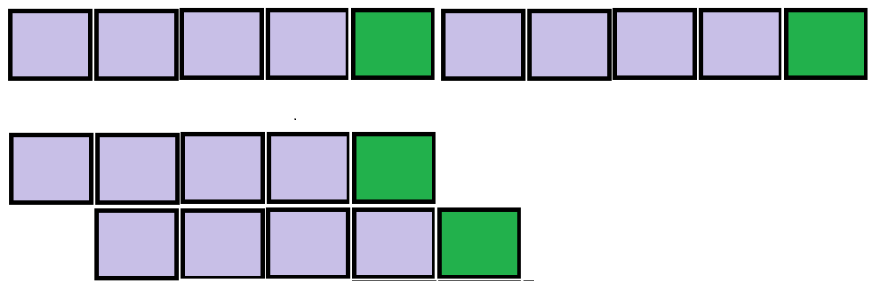

- 각 네모 1개에 50 cycles을 의미합니다.
- 회색 네모는 stall, 녹색 네모는 스레드가 실행될 때를 의미합니다.

load 2개, non memory instruction 100개를 실행하는데 각각 500 cycles, 300 cycles이 걸렸습니다.

동일한 개수의 명령을 실행할 때 2개의 thread가 $500 / 300 =$ 약 $1.67$배 빠르다는 것을 알 수 있습니다.

.

</br>

---

</br>
.

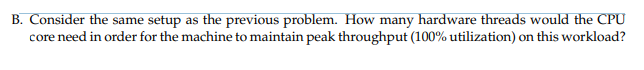

$1000 \times (65,536 \times (200 + 50)) $

- 2개의 스레드를 사용할 시 load 명령이 다음과 같이 나눠집니다.

- 32KB이니 8192개의 float을 보관할 수 있음, LRU를 사용한다면 자기보다 큰 배열의 경우 100% cache miss가 발생

- load 시간을 non memory instruction이 실행되는 시간으로 숨겨야합니다.

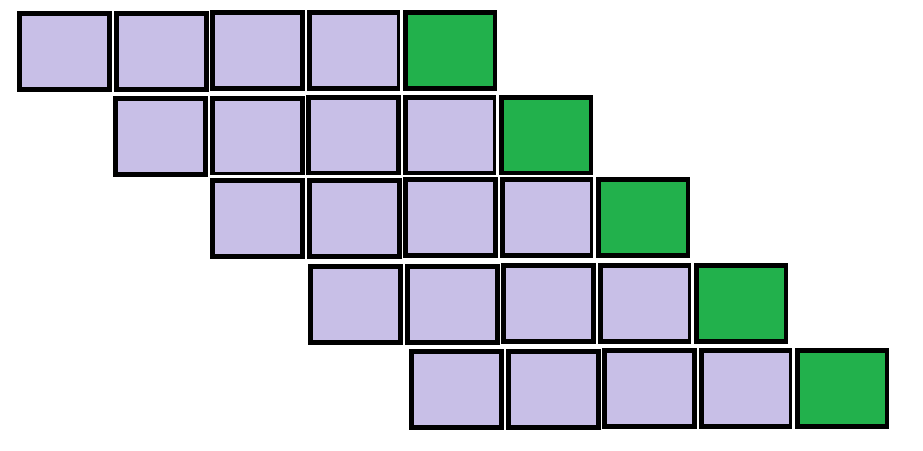

네모 1개의 50clcok

- 회색은 stall, 초록색 부분은 non memory instruction 실행 부분

총 5개?

- 질문: 시작 부분에서 load로 인한 cold start miss가 존재하는데 100%를 어떻게 만드나요?

.

</br>

---

</br>
.

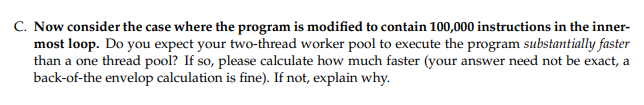

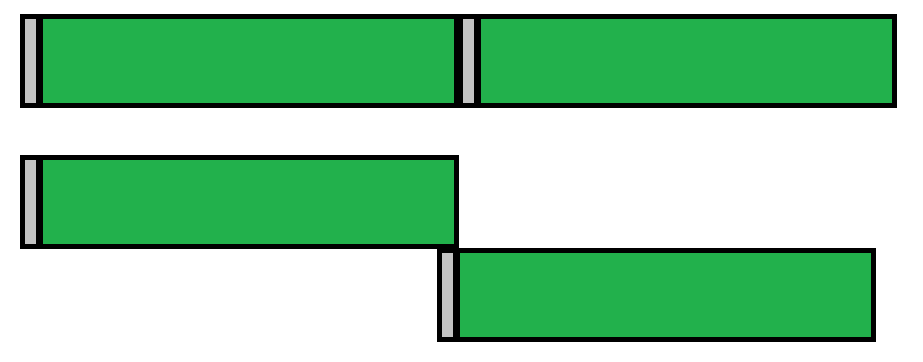

2개의 스레드를 사용하는 경우

load 횟수 - 1 번 200 clock cycle을 숨길 수 있습니다.

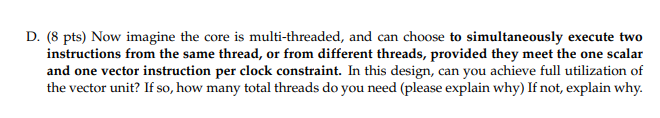

조건

1. cache 크기가 1MB로 변경
2. 1 스레드가 2스레드보다 빠르다면 얼마나 빠른가?

우선 이 문제에서 한 루프에서 $1024 \times 64 = 65,536$개의 float이 load 됩니다.

- cache가 1MB라면 1,048,576 bytes이니 $1,048,576 / 4 = 262,144$로 모든 float 데이터를 cache에 저장할 수 있습니다.
- 이 경우 i = 0 일때를 제외하고는 miss가 발생하지 않습니다.
- 그렇기 때문에 stall을 숨겨서 얻을 수 있는 속도 증가는 없지만 각 loop가 독립적이기 때문에 multi thread가 더 빠릅니다. (값을 적재하는 시간이 단축되어서)




.

</br>

---

</br>
.

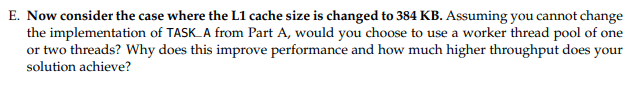

위 조건에서 cache의 크기를 384KB로 변경한 문제입니다.



cache가 줄어들었을 때 multi thread가 가지게 되는 부정적인 효과는 thread 경합인 것 같은데 이 부분을 어떻게 반영해야하는지 잘 모르겠습니다.

.

</br>

---

</br>
.

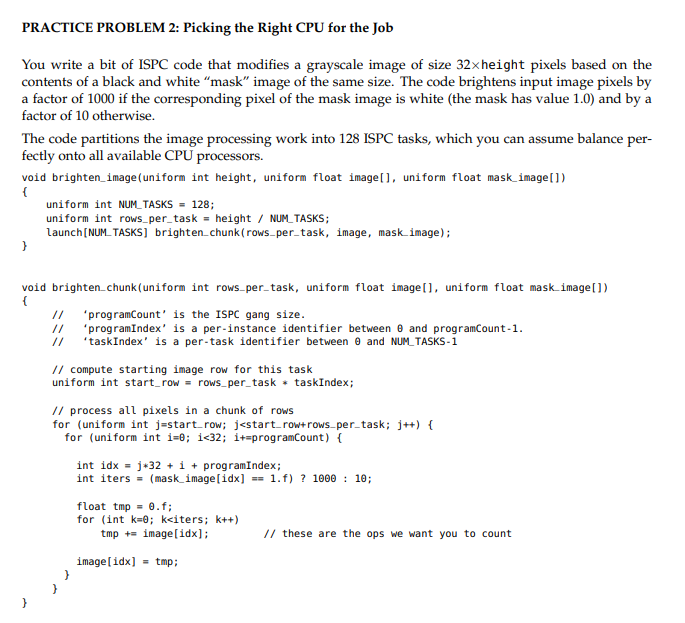

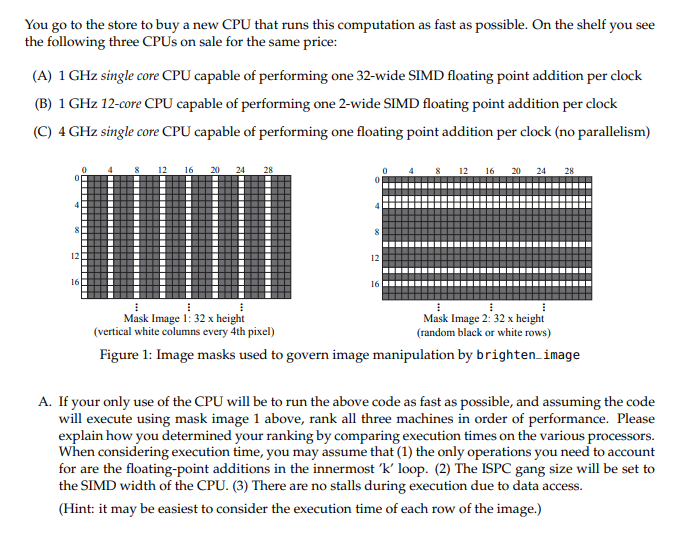

hint: 각 행에 대한 처리 시간을 생각해보자
 - mask1을 봐본다면 3개의 검은색 픽셀 다음에 1개의 흰색 픽셀이 존재합니다.
 - 흰색 픽셀과 검은색 픽셀에 대한 연산은 각각 1000배, 10배 밝기 조절로 서로 다릅니다.

 </br>

1. (B)의 경우 2-wide SIMD로 (A)보다 한번에 연산하는 횟수는 적지만 1번째 mask 이미지는 한번에 계산할 수 없기에 여러 번 짧게 그리고 병렬로 계산하는 B가 제일 빠를 것 같습니다.

2. (C)의 경우 (A)가 32-wide SIMD를 제대로 활용하지 못하기 때문에 C가 더 빠를 것으로 생각됩니다.

3. (A) 한 가지 연산으로 이루어진 row가 아니라서 제일 느릴 것 같습니다.




다음과 같은 결과가 나올 것 같습니다.

.

</br>

---

</br>
.

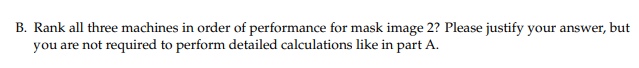

1. (A) 2 mask 같은 경우 row가 32픽셀이고 하나의 연산으로 이루어져있기 때문에 한 번에 계산이 끝날 것 같습니다.

2. (B) 2픽셀 씩 진행을 하기 때문에 한 개의 row를 완료하는데 16cycles이 걸립니다. 하지만 multi core이기 때문에 12개의 row가 완료됩니다.

3. (C)

.

</br>

---

</br>
.

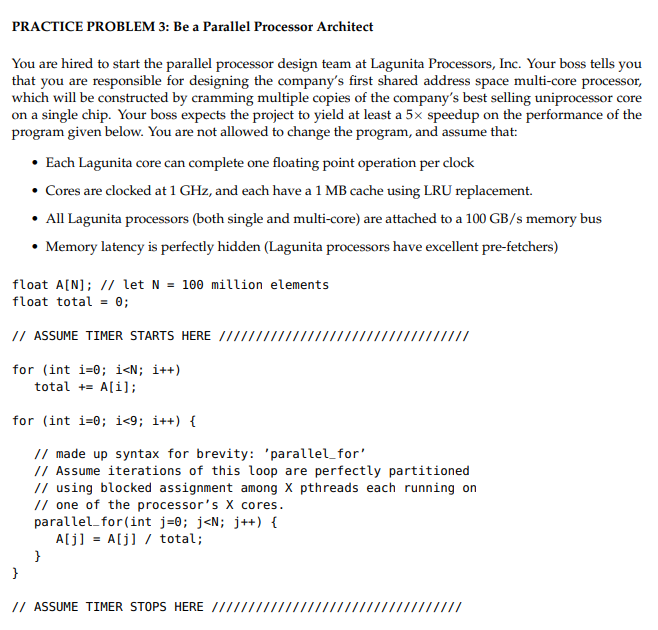

조건

- shared addres space processor를 설계할 때

- Lagunita core는 clock 당 하나의 부동 수소점 연산을 완료합니다.

- core는 1GHz로 클럭되며 각 LRU 교체를 하는 1MB cache를 가집니다.

- 모든 Lagunita processor(single core, multi core)는 100GB/s memory bus에 연결됩니다.

- memory 대기 시간은 완벽하게 숨겨집니다. 


코드

- for loop로 100 million(1억)개의 원소를 다 더합니다.(독립적인 명령어)
- 각 1억 개의 원소들을 total로 나누어 저장합니다.


기타 사항

- 루프 할당은 각 쓰레드에 완벽하게 분할되어 할당됩니다.


</br>


 -

</br>

첫 번째 루프

</br>

```
for (int i=0; i<N; i++)
    total += A[i];
```

이 부분은 이전 i에 대한 total 값이 현재 i에 대한 total에 영향을 주는 것으로 봐야하는지 햇갈리는 부분입니다.

- 데이터 의존성이 있다고 본다면 여기서는 pre-fetch만으로 속도 증가를 생각해야 될 것같습니다.

이 부분에서는 load 1억 번, add 1억 번으로 약 2억 번의 instruction이 진행되는 것 같습니다.
 - A 배열의 원소를 가져오니 

</br>




두 번째 루프 

</br>

```
for (int i=0; i<9; i++) {
    parallel_for(int j=0; j<N; j++) {
        A[j] = A[j] / total;
    }
}
```

이 부분은 병렬처리가 가능한 부분으로 보여집니다. A 원소에 접근하고 그 값을 total 값으로 나누는 방식으로 진행되는 것 같은데

- load 1억 번, div 1억 번을 각각 10번 진행하는 것 같습니다. 약 20 억 번의 instruction이 실행되는 것으로 보입니다.

- 첫 번째 루프가 완료되기 전까지는 진행하지 못하는 종속성을 가집니다.



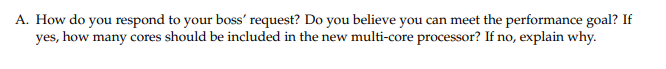

약 22억 번의 instruction이 진행되는 것 같아 보입니다.

- 첫 번째 루프를 병렬화 하지 못하니 전체 시간의 1/11은 더 빠르게 하지 못하고 10/11 만 빠르게 하여 속도를 5배 증가 시킨다고 가정하겠습니다.
 - 첫 번째 루프의 instruction 수가 2억 번으로 전체 instuction에 1/11를 담당하니 소요 시간도 1/11을 담당한다고 생각하여 진행했습니다.

</br>

적어도 5배의 성능 증가를 요구했으니 다음과 같이 계산을 진행해보겠습니다.

- $5 < \frac 1 {\frac 1 {11} + \frac {\frac {10} {11}} N}$
</br>

- $5 < \frac 1 {0.09 + \frac {0.91} N}$

> 답: core가 9개 이상인 경우 speed up이 5배 이상이 됩니다.

.

</br>

---

</br>
.

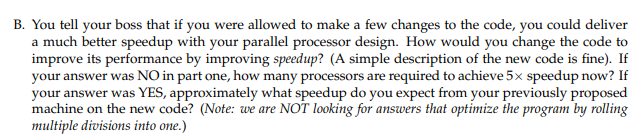

나누기 연산을 곱 연산으로 바꿔주면 더 빨라질 거 같습니다.



```
for (int i=0; i<9; i++) {
    parallel_for(int j=0; j<N; j++) {
        A[j] = A[j] / total;
    }
}
```

이 과정을

```
inverse_total = 1 / total

for (int i=0; i<9; i++) {
    parallel_for(int j=0; j<N; j++) {
        A[j] = A[j] * inverse_total;
    }
}
```

다음과 같이 바꾸면 나눗셈보다 곱셈이 더 빠르기 때문에 프로그램이 더 빨라질 것 같습니다.

.

</br>

---

</br>
.

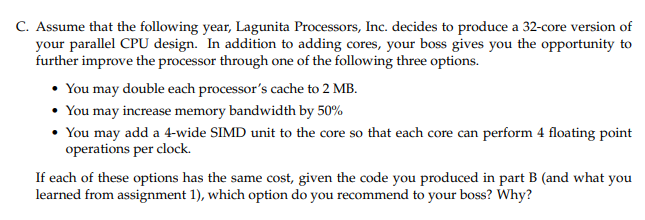

4-wide SIMD를 고를 것 같습니다.

가장 많은 연산을 차지하는 부분이 모든 배열들에 대해서 inverse_total을 곱해주는 방식이기 때문에 SIMD를 사용했을 때가 다른 것보다 더 빨라질 것 같습니다. 

.

</br>

---

</br>
.

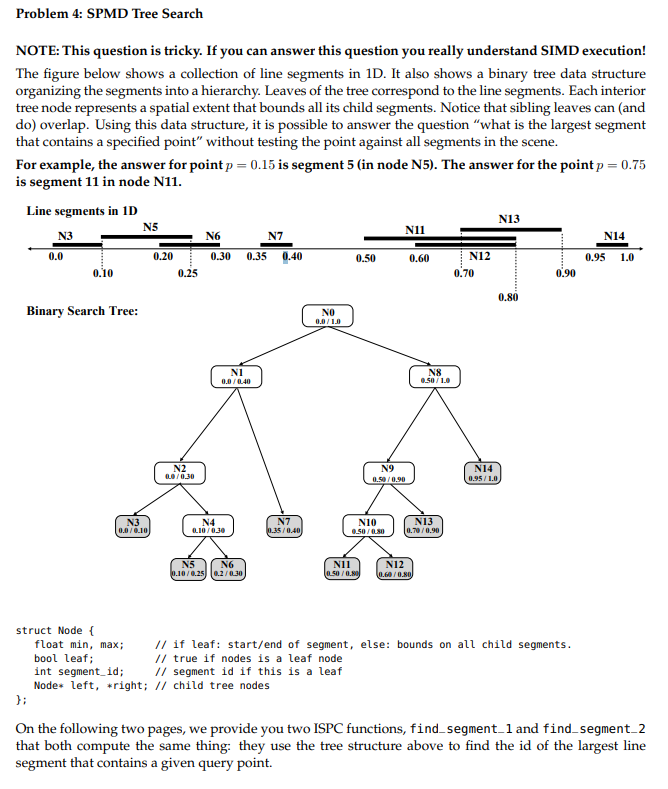

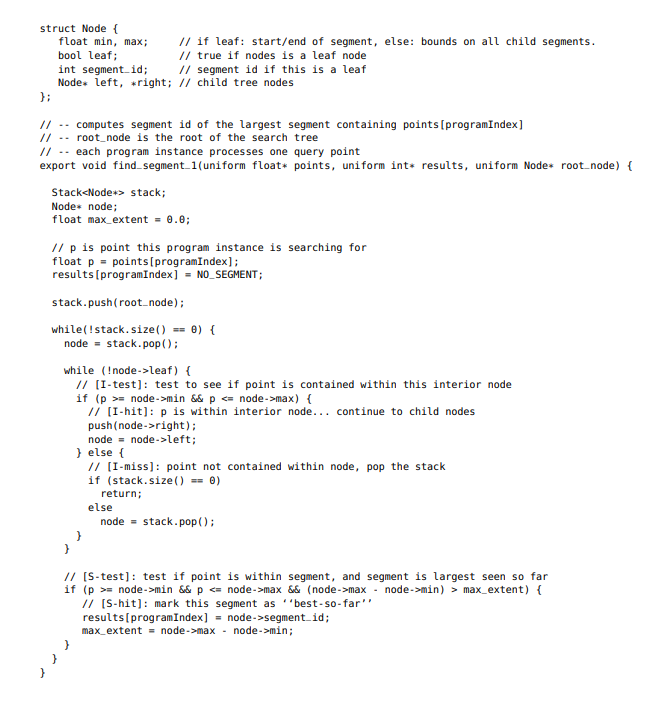

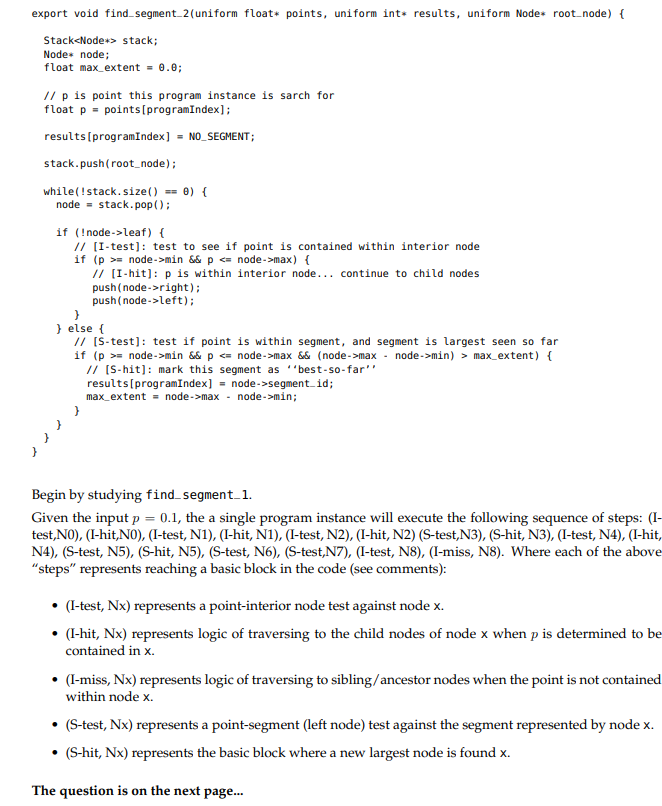

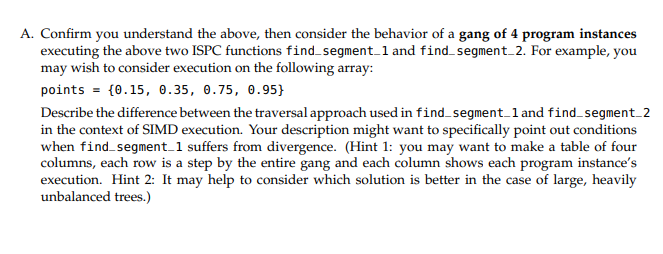

두 방식은 내부 노드를 처리하는 방식이 다릅니다.

find_segment1의 경우 miss가 있는 경우에만 노드가 스택에서 pop이 됩니다.
 - miss가 발생할 때만 pop이 되니 miss가 발생할 때까지 child node로 탐색이 진행되지 않습니다.
 - 4개의 instance가 모두 동일한 경로를 탐색하고 가장 큰 segment를 찾습니다.
 - 같은 경로를 통과함으로 4개의 instance의 결과는 같습니다.

find_segment2는 hit과 miss 모두에 대해서 스택으로 push가 됩니다.
 - hit, miss에 대해 모두 push 되므로 find_segment2의 순회는 point가 노드에 해당되어도 계속 child 노드로 이동합니다.
 - 때문에 point가 내부 노드에 포함되는지 여부에 따라 instance가 서로 다른 경로를 통과할 수 있고 이로 인해 각 결과가 다를 수 있습니다.

.

</br>

---

</br>
.

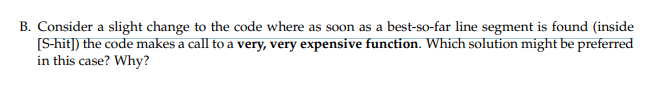

[S-shit]내에서 최적의 선분을 빠르게 찾는 expensive function을 호출하는 코드로 변경되는 경우 해당 함수가 여러 번 호출된다면 리소스 사용량과 실행 시간이 증가하니 loop 밖에서 검색이 완료되고 진행되는 것이 좋아보입니다. 